In [15]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams

In [16]:
data=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Downloads\test mach learn\Paper1\MonthWiseMarketArrivals_Clean.csv")

In [17]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [18]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [19]:
data.date=pd.to_datetime(data.date,format="%B-%Y")
data=data.sort_values(["date"],ascending=True)
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
5399,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
5420,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
5441,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
5461,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
5481,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01
...,...,...,...,...,...,...,...,...,...,...
8226,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
3644,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
10106,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01
8962,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA,2016-02-01


In [20]:
data=data.set_index(data.date)


In [21]:
data=data.iloc[:,[0,3,4,5,6]]

<h1>q1<h1>

In [22]:
data

,market,quantity,priceMin,priceMax,priceMod
date,,,,,
1996-01-01,LASALGAON(MS),225063,160,257,226
1996-02-01,LASALGAON(MS),196164,133,229,186
1996-03-01,LASALGAON(MS),178992,155,274,243
1996-04-01,LASALGAON(MS),192592,136,279,254
1996-05-01,LASALGAON(MS),237574,154,312,269
...,...,...,...,...,...
2016-02-01,RAIPUR(CHGARH),4300,950,1142,1077
2016-02-01,INDORE(MP),97178,104,856,575
2016-02-01,YEOLA(MS),272527,347,984,730


In [23]:
col=data.columns
col


Index(['market', 'quantity', 'priceMin', 'priceMax', 'priceMod'], dtype='object')

In [24]:
for i in range(0,len(col)):
    if(col[i]=="market"):
        le = LabelEncoder().fit(data[col[i]])
        le1 = le.transform(data[col[i]])
        le1 = pd.DataFrame(le1)
        data[col[i]]=le1

In [25]:
pd.date_range(start=data.index[0],periods=144,freq="M")

DatetimeIndex(['1996-01-31', '1996-02-29', '1996-03-31', '1996-04-30',
               '1996-05-31', '1996-06-30', '1996-07-31', '1996-08-31',
               '1996-09-30', '1996-10-31',
               ...
               '2007-03-31', '2007-04-30', '2007-05-31', '2007-06-30',
               '2007-07-31', '2007-08-31', '2007-09-30', '2007-10-31',
               '2007-11-30', '2007-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [27]:
data1=data['quantity']
data1

date
1996-01-01    225063
1996-02-01    196164
1996-03-01    178992
1996-04-01    192592
1996-05-01    237574
               ...  
2016-02-01      4300
2016-02-01     97178
2016-02-01    272527
2016-02-01     90142
2016-02-01    168020
Name: quantity, Length: 10227, dtype: int64

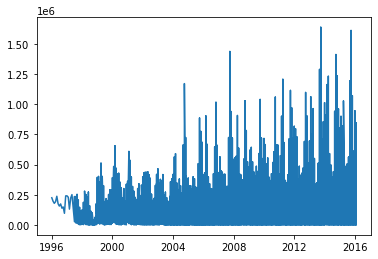

In [28]:
plt.plot(data1)

In [29]:
result = seasonal_decompose(np.array(data['quantity']), model='multiplicative', freq=4)


C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_6600/3159388780.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(np.array(data['quantity']), model='multiplicative', freq=4)


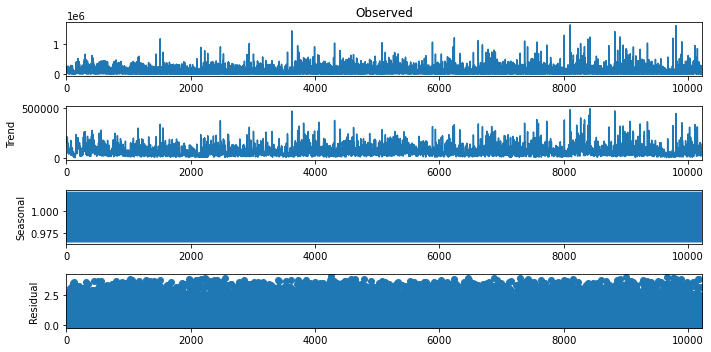

<Figure size 2880x720 with 0 Axes>

In [30]:
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

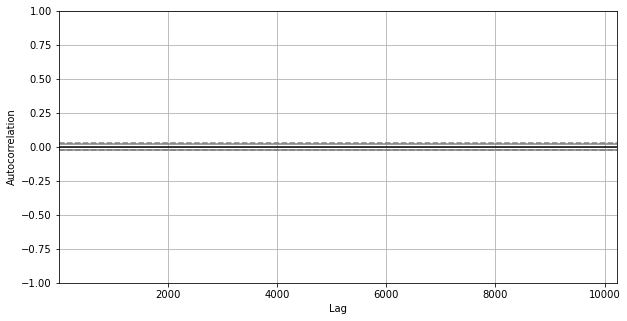

In [31]:
x=pd.plotting.autocorrelation_plot(data)

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [33]:

#build and train the model on the training data
model = HWES(data1, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit(optimized=True, use_brute=True)


C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
#print out the training summary
print(fitted.summary())

#create an out of sample forcast for the next 12 steps beyond the final data point in the training data set
sales_forecast = fitted.forecast(steps=12)

                        ExponentialSmoothing Model Results                       
Dep. Variable:                 quantity   No. Observations:                 10227
Model:             ExponentialSmoothing   SSE                 165458254656150.438
Optimized:                         True   AIC                          240437.613
Trend:                         Additive   BIC                          240553.338
Seasonal:                Multiplicative   AICC                         240437.680
Seasonal Periods:                    12   Date:                  Mon, 23 May 2022
Box-Cox:                          False   Time:                          22:30:02
Box-Cox Coeff.:                    None                                          
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0403571                alpha                 True
smoothing_trend 

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [35]:
fig = plt.figure()

<Figure size 720x360 with 0 Axes>

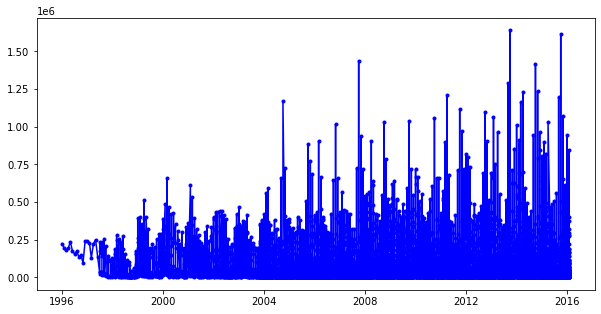

In [45]:
fig.suptitle("onion quantity")
past = plt.plot(data.index,data.quantity, 'b.-', label="date")
#future, = plt.plot(df_test.index, df_test, 'r.-', label="quantity")
#predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
#plt.legend(handles=[past, future, predicted_future])
#plt.legend(handles=[past])

plt.show()